In [1]:
import pickle

In [2]:
import pythonwhois  # i'm using this http://cryto.net/pythonwhois

In [3]:
from urllib.error import HTTPError
from requests.exceptions import HTTPError


In [4]:
import time
import random


In [5]:
import urllib

In [6]:
## function that forces system to wait random time, with upper bound on wait equals to maxTime
def waitRandomTime(maxTime=7):
    ## setting up the seed
    tm = int(round(time.time()))
    random.seed(tm)

    tim = random.randint(0, 8 * 100) / 100.0
    time.sleep(tim)



In [7]:
### safely open the saved pickle file
def safelyOpen(nameOfSavedDictionary):
    try:
        with open(nameOfSavedDictionary + '.pickle', 'rb') as handle:
            return pickle.load(handle)
    except (NameError, FileNotFoundError):
        print("File was not found ")

In [8]:
def uniqify(seq):
    # Not order preserving
    keys = {}
    for e in seq:
        keys[e] = 1
    return list(keys.keys())

In [9]:
dataFake = safelyOpen('fakeKaggleEnglishOver300')

In [10]:
sites = dataFake.ix[:,'site_url']

In [11]:
urls_fake = dataFake.ix[:,'site_url']

In [12]:
urls_fake = urls_fake.to_dict()

In [13]:
## creating sample urls 

In [14]:
good_urls = ['nytimes.com', 'wsj.com', 'abcnews.go.com', 'cnn.com', 'cbsnews.com', 'foxnews.com', 'msnbc.com',
                  'nbcnews.com','oann.com', 'latimes.com', 'usatoday.com', 'washingtonpost.com', 'newsweek.com',
                  'time.com', 'usnews.com', 'theguardian.com', 'telegraph.co.uk', 'thetimes.co.uk', 'ft.com',
                  'independent.co.uk', 'bbc.com', 'standard.co.uk', 'dailymail.co.uk', 'express.co.uk',
                  'dailytelegraph.com.au', 'thestar.com','theglobeandmail.com', 'nationalpost.com',
                   'calgaryherald.com', 'herald.ie', 'irishtimes.com', 'independent.ie', 'afr.com.au',
                   'theaustralian.com.au', 'thesaturdaypaper.com.au', 'reddit.com', 'Cnn.com', 'Bbc.co.uk', 'Weather.com',
                   'News.yahoo.com', 'Huffingtonpost.com','Forbes.com', 'Foxnews.com', 'news.google.com' ,
                   'Shutterstock.com', 'Timesofindia.indiatimes.com', 'Bloomberg.com', 'Reuters.com', 'Wunderground.com',
                   'Money.cnn.com', 'Indianexpress.com', 'Nbcnews.com', 'Latimes.com', 'cnbc.com', 'cbsnews.com',
                   'vox.com', 'Abcnews.go.com', 'Nypost.com', 'Theatlantic.com', 'Chicagotribune.com', 'Chinadaily.com.cn'
                   ,'Hollywoodreporter.com', 'Sfgate.com', 'Usnews.com', 'Economist.com', 'Aljazeera.com', 'Fortune.com',
                   'Newsnow.co.uk', 'Variety.com', 'Euronews.com', 'Washingtontimes.com', 'Bostonglobe.com', 'Newsweek.com'
                   ]

In [15]:
dataTrue = safelyOpen('nytRawText2016')

In [20]:
url_true = create_true_urls()

In [24]:
num_true = {key: [222, 999] for key in dataTrue.keys()}

In [25]:
num_fake = {key: []}

NameError: name 'key' is not defined

In [17]:
def create_true_urls():
    return {key: good_urls[random_choice()] for key in dataTrue.keys()}

In [19]:
def random_choice():
    return random.randint(0, len(good_urls) - 1)

In [ ]:
####

In [21]:
### test my url analysis

In [28]:
import pythonwhois  # it's using this http://cryto.net/pythonwhois
from urllib.error import HTTPError
from requests.exceptions import HTTPError
import time
import random
import urllib
import helpful_functions
import urllib.request
import socket
import math

class url_analysis():

    __final_dictionary = None
    __data = None
    __urls = None
    __meta = None
    __meta_data_name = None

    # data = numerical data you already have
    # urls = urls for the numerical data
    # false = are data to be considered false or not false
    def __init__(self, data, urls, false):
        self.__data = data
        self.__urls = urls

        if false:
            self.__meta_data_name = 'fake_urls_metadata'
        else:
            self.__meta_data_name = 'true_urls_metadata'


    # strategy: loop through the urls that belong to data, for given url look into my precomputed metadata
    # if you find url ok calculate url_analysis, if not query pythonwhois and calculate it after that and add to
    # meta_data I am keeping offline

    # MAIN FUNCTIONS
    def __open_and_produce_url_meta(self):
        self.__meta = helpful_functions.safely_open(self.__meta_data_name, pick=True)

        # NOTE: fix this function tomorrow
        if self.__meta is not None:
            uniq = helpful_functions.uniqify(self.__urls.values())
            difference = set(uniq) - set(self.__meta)
            if difference is not None:
                print('difference is not empty, is of size: ' + str(len(difference)))
                print('we add it to self.__meta, that is of size: ' + str(len(self.__meta)))

                add_to_meta = {}
                self.__find_url_meta(difference, add_to_meta)
                helpful_functions.add_dict(self.__meta, add_to_meta)

                print('we added missing urls metadata to self.__meta, now it is of size: ' + str(len(self.__meta)))
                print('saving the meta on disc')
                helpful_functions.save_to_file(self.__meta, self.__meta_data_name, pick=True)

        else:
            self.__meta = {}
            self.__find_url_meta(self.__urls.values(), self.__meta)
            helpful_functions.save_to_file(self.__meta, self.__meta_data_name, pick=True)

    # looping through the article ids and adding the outside url features, as calculated from appropriate meta
    def url_analysis(self):
        self.__open_and_produce_url_meta()

        # looking for creation date
        for key in self.__data.keys():
            url = self.__urls[key]
            try:
                year = int(self.__meta[url]['creation_date'][0].year)
            except (TypeError, KeyError):
                year = 2000

            #year_bias = self.__year_bias(year)
            year_bias = self.__sigmoid_year(year)
            self.__data[key].extend(year_bias)




    # this is proxy 0 function, you better should do some clustering will be proxy 1
    # maybe you should implement this as sigmoid function from 1990 ---> 1 and 2017 --> -1, centered at 2000 ???
    def __year_bias(self, year):
        if year < 2000:
            return [1]
        elif year > 2000:
            return [-1]
        else:
            return [0]
        
        
    def __sigmoid_year(self, year):
        return [self.__sigmoid(year)]

    def __find_url_meta(self, domains, meta_fake):
        if type(meta_fake) == dict:
            for dom in domains:
                try:
                    print(dom)
                    meta_fake[dom] = pythonwhois.get_whois(dom)
                except (urllib.request.HTTPError, HTTPError, ConnectionResetError, UnicodeDecodeError):
                    helpful_functions.wait_random_time(45)
                except (KeyError, socket.gaierror):
                    meta_fake[dom] = None
                except pythonwhois.shared.WhoisException:
                    meta_fake[dom] = None
        else:
            raise ValueError

    # HELPFUL FUNCTIONS

    # getting data from outside
    def get_data(self):
        return self.__data
    
    def __sigmoid(self, x, alpha=0.3, shift=2000):
        return (1 / (1 + math.exp(-alpha*(x - shift))))

    

In [376]:
del(true_analysis)

In [26]:
true_analysis = url_analysis(num_true, url_true, false=False)

In [29]:
true_analysis.url_analysis()

difference is not empty, is of size: 1
we add it to self.__meta, that is of size: 71
Indianexpress.com
we added missing urls metadata to self.__meta, now it is of size: 71
saving the meta on disc


In [30]:
len(num_true[list(num_true.keys())[0]])

3

In [ ]:
###

In [31]:
import math

In [362]:
def sigmoid(x, alpha=0.3, shift=2000):
    return (1 / (1 + math.exp(-alpha*(x - shift))))

In [364]:
sigmoid(1998)

0.35434369377420455

In [26]:
sites = uniqify(sites)

In [32]:
domains = ['nytimes.com']
for dom in domains:
    details = pythonwhois.get_whois(dom)
    print(details)  

{'id': ['91991_DOMAIN_COM-VRSN'], 'status': ['clientUpdateProhibited (https://www.icann.org/epp#clientUpdateProhibited)', 'clientTransferProhibited (https://www.icann.org/epp#clientTransferProhibited)', 'clientDeleteProhibited (https://www.icann.org/epp#clientDeleteProhibited)', 'serverUpdateProhibited (https://www.icann.org/epp#serverUpdateProhibited)', 'serverTransferProhibited (https://www.icann.org/epp#serverTransferProhibited)', 'serverDeleteProhibited (https://www.icann.org/epp#serverDeleteProhibited)'], 'creation_date': [datetime.datetime(1994, 1, 17, 21, 0)], 'expiration_date': [datetime.datetime(2023, 1, 18, 21, 0), datetime.datetime(2023, 1, 18, 21, 0)], 'updated_date': [datetime.datetime(2016, 10, 21, 15, 12, 35)], 'registrar': ['MarkMonitor, Inc.'], 'whois_server': ['whois.markmonitor.com'], 'nameservers': ['ns4.p24.dynect.net', 'ns3.p24.dynect.net', 'dns-plx.ewr1.nytimes.com', 'ns1.p24.dynect.net', 'ns2.p24.dynect.net', 'dns-plx.sea1.nytimes.com'], 'emails': ['abusecomplai

In [33]:
details.keys()

dict_keys(['id', 'status', 'creation_date', 'expiration_date', 'updated_date', 'registrar', 'whois_server', 'nameservers', 'emails', 'contacts', 'raw'])

In [34]:
details['creation_date']

[datetime.datetime(1994, 1, 17, 21, 0)]

In [35]:
def find_url_meta(domains, meta_fake):
    if type(meta_fake) == dict:
        for dom in domains:
            try:
                print(dom)
                meta_fake[dom] = pythonwhois.get_whois(dom)
            except (urllib.request.HTTPError, HTTPError, ConnectionResetError, UnicodeDecodeError):
                waitRandomTime(45)
            except KeyError:
                meta_fake[dom] = None
            except pythonwhois.shared.WhoisException:
                meta_fake[dom] = None
    else:
        raise ValueError
        
        

In [60]:
ks = safelyOpen('fake_urls_metadata')

In [62]:
fake_keys = list(ks.keys())

In [70]:
fake_years = []

In [71]:
for xx in ks.keys():
    try:
        fake_years.append(ks[xx]['creation_date'][0].year)
        print(ks[xx]['creation_date'][0].year)
    except (TypeError,KeyError):
        print('no creation date for ' + xx)

2012
2009
2015
2010
1997
2010
2010
2013
2015
2014
2016
2013
1995
2012
2015
2014
1995
2012
2008
2007
2014
2016
2016
2012
2006
2006
1999
2015
2010
2009
1999
2009
2010
2016
2013
1998
2007
2001
1998
2015
2007
2013
1998
2010
1998
2014
1999
2013
2015
2011
2016
2007
2016
2013
2016
2016
2010
1995
2009
2002
2013
2007
2008
2016
2008
2010
1998
2012
2009
no creation date for globalresearch.ca
2000
2013
2010
2009
2012
2010
2012
2011
2004
2010
2014
2009
1996
2009
2016
2003
1999
2001
2011
2013
2010
no creation date for jewsnews.co.il
2013
2014
2009
1999
2013
2012
2002
2012
2016
2013
2016
2012
2004
2013
2005
2013
2005
2014
2016
2006
1996
2010
2008
2000
2012
2015
2003
2016
2010
2009
2011
2011
2008
2015
2011
2016
2002
no creation date for presstv.ir
2001
2008
2016
2003
2009
2013
2012
2013
2016
1999
2012
2003
2012
1991
2013
2014
1999
2010
2015
2011
2009
2011
2007
2015
2016
2011
2010
2012
2016
2012
2012
2013
2008
2010
2004
2016
no creation date for theearthchild.co.za
2009
2014
2011
2013
2016
2013
1999
19

In [74]:
import pandas as pd

In [75]:
fake_years = pd.DataFrame(fake_years)

In [79]:
fake_years.median(0)

0    2011.0
dtype: float64

In [80]:
## non fake years

In [84]:
true = safelyOpen('true_urls_metadata')

In [93]:
true_years = []

In [96]:
true_years = pd.DataFrame(true_years)

In [98]:
true_years.columns = ['true articles years']

In [99]:
fake_years.columns = ['fake article years'] 

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")



/Users/Pipjak/anaconda/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


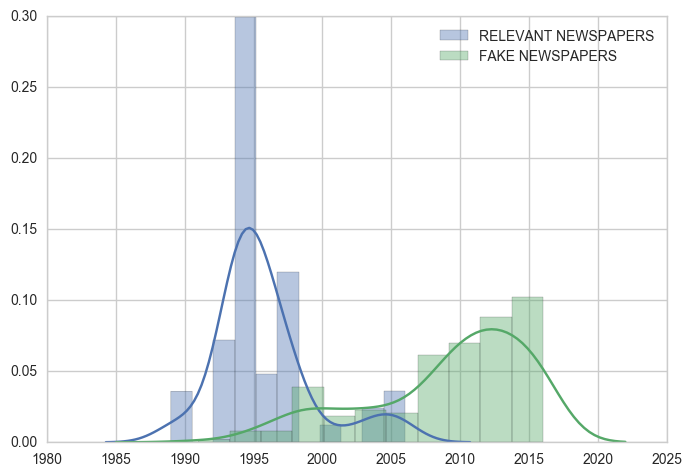

In [103]:
fig, ax = plt.subplots()

names  = ['RELEVANT NEWSPAPERS', 'FAKE NEWSPAPERS']
counter = 0
for a in [true_years['true articles years'], fake_years['fake article years']]:
    sns.distplot(a, label=names[counter])
    counter+=1
    

ax.set( ylabel="",
       xlabel="")
ax.legend(loc='upper right')



In [84]:
meta_fake_old = meta_fake

In [37]:
meta_fake = {}

In [38]:
find_url_meta(sites, meta_fake)

100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
100percentfedup.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
21stcenturywire.com
abcnews.com.co
abcnews.com.co
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abeldanger.net
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopsecret.com
abovetopse

ConnectionRefusedError: [Errno 61] Connection refused

In [108]:
len(meta_fake.keys())

220

In [112]:
for key in meta_fake.keys():
    if meta_fake[key] == None:
        print(key)

globalresearch.ca
theearthchild.co.za


In [218]:
lal = meta_fake['100percentfedup.com']['']

In [152]:
meta_fake['100percentfedup.com']

{'contacts': {'admin': None,
  'billing': None,
  'registrant': None,
  'tech': None},
 'creation_date': [datetime.datetime(2012, 3, 13, 0, 0)],
 'expiration_date': [datetime.datetime(2020, 9, 29, 0, 0)],
 'nameservers': ['ED.NS.CLOUDFLARE.COM', 'GINA.NS.CLOUDFLARE.COM'],
 'raw': ['Domain Name: 100PERCENTFEDUP.COM\nRegistrar URL: http://www.godaddy.com\nRegistrant Name: Registration Private\nRegistrant Organization: Domains By Proxy, LLC\nName Server: ED.NS.CLOUDFLARE.COM\nName Server: GINA.NS.CLOUDFLARE.COM\nDNSSEC: unsigned\n\nFor complete domain details go to:\nhttp://who.godaddy.com/whoischeck.aspx?domain=100PERCENTFEDUP.COM\n\nThe data contained in GoDaddy.com, LLC\'s WhoIs database,\nwhile believed by the company to be reliable, is provided "as is"\nwith no guarantee or warranties regarding its accuracy.  This\ninformation is provided for the sole purpose of assisting you\nin obtaining information about domain name registration records.\nAny use of this data for any other purpose

In [179]:
for xx in meta_fake.keys():
    try:
        print(meta_fake[xx]['creation_date'])
    except (TypeError,KeyError):
        print('no creation date for ' + xx)
    

[datetime.datetime(2012, 3, 13, 0, 0)]
[datetime.datetime(2009, 11, 3, 0, 0)]
[datetime.datetime(2015, 10, 26, 21, 56, 34), datetime.datetime(2015, 10, 26, 21, 56, 34)]
[datetime.datetime(2010, 5, 12, 0, 0)]
[datetime.datetime(1997, 5, 18, 0, 0)]
[datetime.datetime(2010, 4, 23, 0, 0)]
[datetime.datetime(2010, 9, 5, 20, 33, 25)]
[datetime.datetime(2013, 6, 25, 0, 0)]
[datetime.datetime(2015, 8, 23, 8, 8, 39)]
[datetime.datetime(2014, 7, 7, 0, 0)]
[datetime.datetime(2016, 5, 10, 0, 0)]
[datetime.datetime(2013, 12, 17, 10, 41, 40)]
[datetime.datetime(1995, 8, 11, 4, 0)]
[datetime.datetime(2012, 1, 31, 0, 0)]
[datetime.datetime(2015, 12, 16, 22, 42, 2), datetime.datetime(2015, 12, 16, 22, 42, 2)]
[datetime.datetime(2014, 4, 11, 0, 0)]
[datetime.datetime(1995, 12, 9, 0, 0)]
[datetime.datetime(2012, 1, 16, 4, 0)]
[datetime.datetime(2008, 7, 9, 6, 5, 5)]
[datetime.datetime(2007, 9, 15, 0, 0)]
[datetime.datetime(2014, 10, 2, 7, 17, 29)]
[datetime.datetime(2016, 7, 25, 11, 4, 37)]
[datetime.dat

In [180]:
## query for the true set

In [189]:
good_urls = ['nytimes.com', 'wsj.com', 'abcnews.go.com', 'cnn.com', 'cbsnews.com', 'foxnews.com', 'msnbc.com',
                  'nbcnews.com','oann.com', 'latimes.com', 'usatoday.com', 'washingtonpost.com', 'newsweek.com',
                  'time.com', 'usnews.com', 'theguardian.com', 'telegraph.co.uk', 'thetimes.co.uk', 'ft.com',
                  'independent.co.uk', 'bbc.com', 'standard.co.uk', 'dailymail.co.uk', 'express.co.uk',
                  'dailytelegraph.com.au', 'thestar.com','theglobeandmail.com', 'nationalpost.com',
                   'calgaryherald.com', 'herald.ie', 'irishtimes.com', 'independent.ie', 'afr.com.au',
                   'theaustralian.com.au', 'thesaturdaypaper.com.au', 'reddit.com', 'Cnn.com', 'Bbc.co.uk', 'Weather.com',
                   'News.yahoo.com', 'Huffingtonpost.com','Forbes.com', 'Foxnews.com', 'news.google.com' ,
                   'Shutterstock.com', 'Timesofindia.indiatimes.com', 'Bloomberg.com', 'Reuters.com', 'Wunderground.com',
                   'Money.cnn.com', 'Indianexpress.com', 'Nbcnews.com', 'Latimes.com', 'cnbc.com', 'cbsnews.com',
                   'vox.com', 'Abcnews.go.com', 'Nypost.com', 'Theatlantic.com', 'Chicagotribune.com', 'Chinadaily.com.cn'
                   ,'Hollywoodreporter.com', 'Sfgate.com', 'Usnews.com', 'Economist.com', 'Aljazeera.com', 'Fortune.com',
                   'Newsnow.co.uk', 'Variety.com', 'Euronews.com', 'Washingtontimes.com', 'Bostonglobe.com', 'Newsweek.com'
                   ]

In [190]:
meta_true = {}

In [193]:
find_url_meta(good_urls, meta_true)

nytimes.com
wsj.com
abcnews.go.com
cnn.com
cbsnews.com
foxnews.com
msnbc.com
nbcnews.com
oann.com
latimes.com
usatoday.com
washingtonpost.com
newsweek.com
time.com
usnews.com
theguardian.com
telegraph.co.uk
thetimes.co.uk
ft.com
independent.co.uk
bbc.com
standard.co.uk
dailymail.co.uk
express.co.uk
dailytelegraph.com.au
thestar.com
theglobeandmail.com
nationalpost.com
calgaryherald.com
herald.ie
irishtimes.com
independent.ie
afr.com.au
theaustralian.com.au
thesaturdaypaper.com.au
reddit.com
Cnn.com
Bbc.co.uk
Weather.com
News.yahoo.com
Huffingtonpost.com
Forbes.com
Foxnews.com
news.google.com
Shutterstock.com
Timesofindia.indiatimes.com
Bloomberg.com
Reuters.com
Wunderground.com
Money.cnn.com
Indianexpress.com
Nbcnews.com
Latimes.com
cnbc.com
cbsnews.com
vox.com
Abcnews.go.com
Nypost.com
Theatlantic.com
Chicagotribune.com
Chinadaily.com.cn
Hollywoodreporter.com
Sfgate.com
Usnews.com
Economist.com
Aljazeera.com
Fortune.com
Newsnow.co.uk
Variety.com
Euronews.com
Washingtontimes.com
Boston

In [223]:
for xx in meta_true.keys():
    try:
        print(xx)
        print(int(meta_true[xx]['creation_date'][0].year))
    except (TypeError,KeyError):
        print('no creation date for ' + xx)
    

nytimes.com
1994
wsj.com
1994
abcnews.go.com
no creation date for abcnews.go.com
cnn.com
1993
cbsnews.com
1994
foxnews.com
1995
msnbc.com
1995
nbcnews.com
1997
oann.com
2004
latimes.com
1990
usatoday.com
1994
washingtonpost.com
1995
newsweek.com
1994
time.com
1993
usnews.com
1995
theguardian.com
1994
telegraph.co.uk
no creation date for telegraph.co.uk
thetimes.co.uk
1996
ft.com
1994
independent.co.uk
no creation date for independent.co.uk
bbc.com
1989
standard.co.uk
no creation date for standard.co.uk
dailymail.co.uk
no creation date for dailymail.co.uk
express.co.uk
no creation date for express.co.uk
dailytelegraph.com.au
no creation date for dailytelegraph.com.au
thestar.com
1995
theglobeandmail.com
1995
nationalpost.com
1998
calgaryherald.com
1995
herald.ie
2006
irishtimes.com
1997
independent.ie
2001
afr.com.au
no creation date for afr.com.au
theaustralian.com.au
no creation date for theaustralian.com.au
thesaturdaypaper.com.au
no creation date for thesaturdaypaper.com.au
reddit.c

In [198]:
import datetime

In [199]:
## ok lets create outside nlp feature

In [200]:
def year_bias(year):
    if year<2000:
        return 1
    elif year>2000:
        return -1
    else:
        return 0

In [224]:
def save_to_file(object_to_save, name_on_disc, pick):
    if pick:
        with open(name_on_disc + '.pickle', 'wb') as handle:
            pickle.dump(object_to_save, handle)
    else:
        with open(name_on_disc, 'wb') as handle:
            pickle.dump(object_to_save, handle)


In [226]:
save_to_file(meta_fake, 'fake_urls_metadata', pick=True)

In [227]:
save_to_file(meta_true, 'true_urls_metadata', pick=True)

In [386]:
type(meta_fake)

dict

In [388]:
'vox.com' in meta_true.keys()

True

In [104]:
s = "a" + "ccc"

In [105]:
s

'accc'